In [1]:
# The C2QA pacakge is currently not published to PyPI. 
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

## Displacement Gate Calibration
The following circuit is a way to calibrate the conditional displacement gate. 

In [2]:
# Simulate the circuit
import c2qa
import numpy
import qiskit

qmr = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_mode=2)
qr = qiskit.QuantumRegister(size=1)
cr = qiskit.ClassicalRegister(size=1)
circuit = c2qa.CVCircuit(qmr, qr, cr)

# qr[0] and cr[0] will init to zero
circuit.cv_initialize(0, qmr[0])

alpha = numpy.sqrt(numpy.pi)

circuit.h(qr[0])
circuit.cv_cnd_d(alpha, -alpha, qr[0], qmr[0])
circuit.cv_d(1j * alpha, qmr[0])
circuit.cv_cnd_d(-alpha, alpha, qr[0], qmr[0])
circuit.cv_d(-1j * alpha, qmr[0])
circuit.h(qr[0])
circuit.measure(qr[0], cr[0])
circuit.snapshot("end_snapshot")

print(f"QumodRegister: {vars(qmr)}")

QumodRegister: {'size': 2, 'num_qumodes': 1, 'num_qubits_per_mode': 2, 'cutoff': 4, 'qreg': QuantumRegister(2, 'q0')}


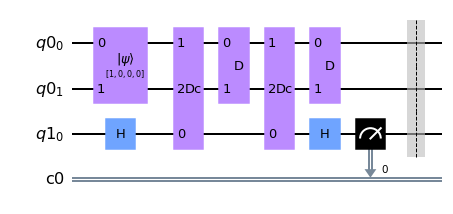

In [3]:
# Draw the circuit
circuit.draw("mpl")

In [4]:
# Simulate one shot with the statevector simulator
backend = qiskit.Aer.get_backend("statevector_simulator")
job = qiskit.execute(circuit, backend)
result = job.result()

state = result.get_statevector(circuit)
counts = result.get_counts(circuit)

print("Simulated statevector:")
print(state)
print(f"Simulated result counts: {counts}")

Simulated statevector:
[ 1.53535657e-01-8.90291944e-16j -1.35316157e-15-3.41272040e-02j
 -4.60246197e-01-1.31223687e-15j  7.63761711e-15-8.73748004e-01j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
Simulated result counts: {'0': 1}


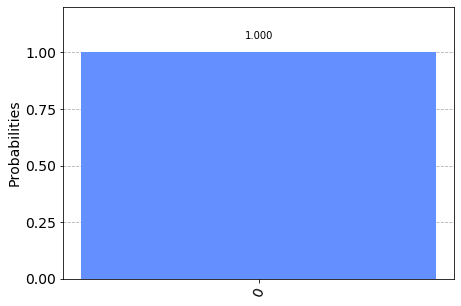

In [5]:
# Plot the counts
qiskit.visualization.plot_histogram(counts)

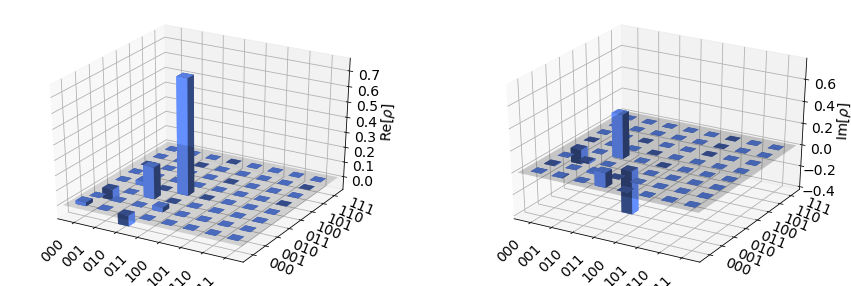

In [6]:
# Plot the state vector
qiskit.visualization.plot_state_city(state)

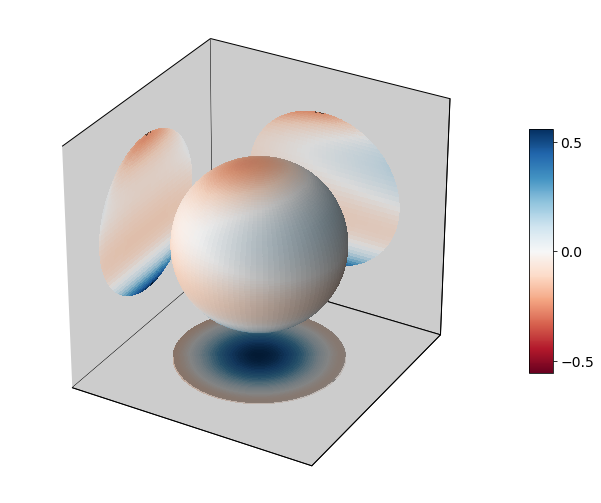

In [7]:
# Plot the Bloch sphere equal angle slice spin Wigner function of the simulation's quantum state.
import c2qa.wigner
c2qa.wigner.plot_wigner_function(state)

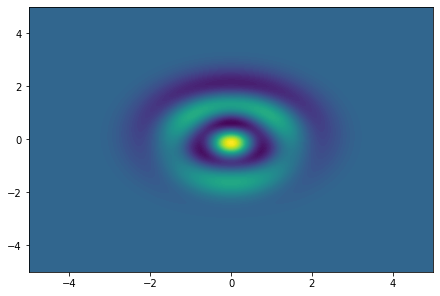

In [8]:
# NOTE: On Windows QuTiP requires MS Visual C++ Redistributable v14+
import matplotlib
import numpy
import qutip

# Following example from http://qutip.org/docs/latest/guide/guide-visualization.html#wigner-function to plot Fock state
xvec = numpy.linspace(-5,5,200)
density_matrix = numpy.outer(state, state)
w_fock = qutip.wigner(qutip.Qobj(density_matrix), xvec, xvec)
fig, ax = matplotlib.pyplot.subplots(constrained_layout=True)
ax.contourf(xvec, xvec, w_fock, 100)
matplotlib.pyplot.show()


In [9]:
# Simulate default 1024 shots with QASM simulator
backend2 = qiskit.Aer.get_backend("qasm_simulator")
job2 = qiskit.execute(circuit, backend2)
result2 = job2.result()

state2 = result2.data()["snapshots"]["statevector"]["end_snapshot"]
counts2 = result2.get_counts(circuit)

print(f"Number of statevectors: {len(state2)}")
print(f"Simulated result counts: {counts2}")

Number of statevectors: 1024
Simulated result counts: {'0': 725, '1': 299}


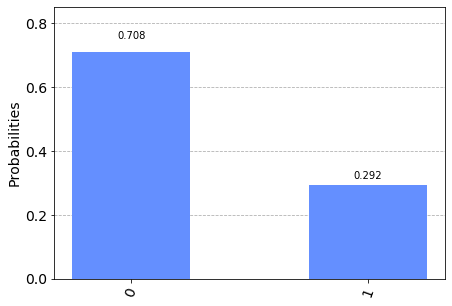

In [10]:
# Plot the counts
qiskit.visualization.plot_histogram(counts2)